In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from utilsforecast.plotting import plot_series 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv(f'../DATA/us_employment.csv')
df = df[df['unique_id'] == 'Total Private']
df.head()

,ds,unique_id,y
0,1939-01-01,Total Private,25338.0
1,1939-02-01,Total Private,25447.0
2,1939-03-01,Total Private,25833.0
3,1939-04-01,Total Private,25801.0
4,1939-05-01,Total Private,26113.0


In [12]:
seasonal_decompose?

Signature:
seasonal_decompose(
    x,
    model='additive',
    filt=None,
    period=None,
    two_sided=True,
    extrapolate_trend=0,
)
Docstring:
Seasonal decomposition using moving averages.

Parameters
----------
x : array_like
    Time series. If 2d, individual series are in columns. x must contain 2
    complete cycles.
model : {"additive", "multiplicative"}, optional
    Type of seasonal component. Abbreviations are accepted.
filt : array_like, optional
    The filter coefficients for filtering out the seasonal component.
    The concrete moving average method used in filtering is determined by
    two_sided.
period : int, optional
    Period of the series (e.g., 1 for annual, 4 for quarterly, etc). Must
    be used if x is not a pandas object or if the index of x does not have
    a frequency. Overrides default periodicity of x if x is a pandas
    object with a timeseries index.
two_sided : bool, optional
    The moving average method used in filtering.
    If True (default)

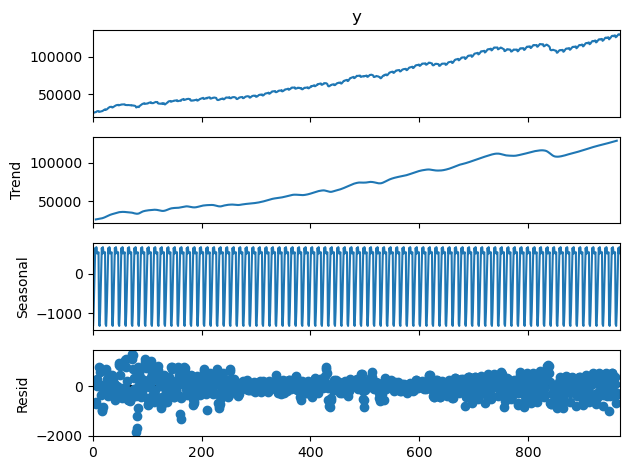

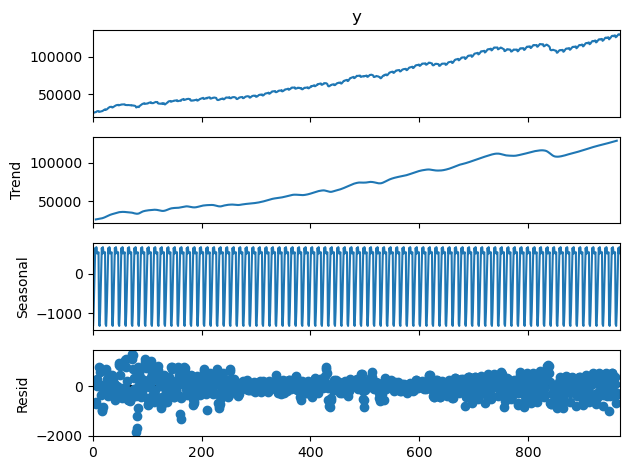

In [13]:
seasonal_decompose(x = df['y'], period=12).plot()

<Axes: ylabel='seasonal'>

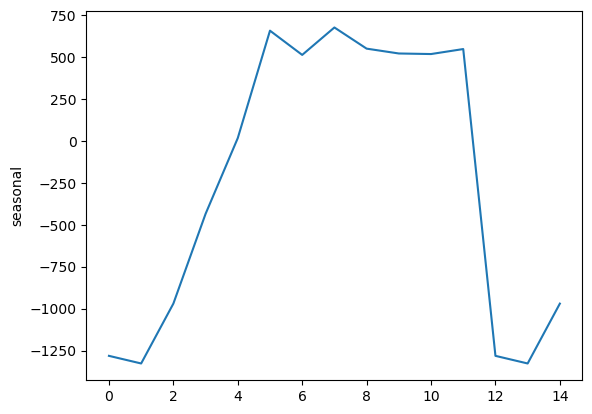

In [28]:
seasonal = seasonal_decompose(df['y'], period=12).seasonal
sns.lineplot(seasonal[0:15])

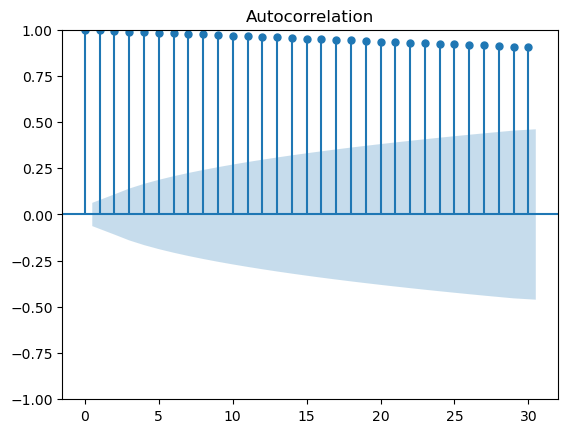

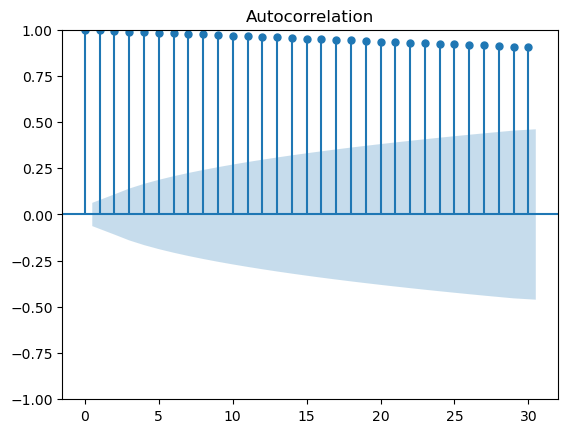

In [32]:
plot_acf(df['y'])

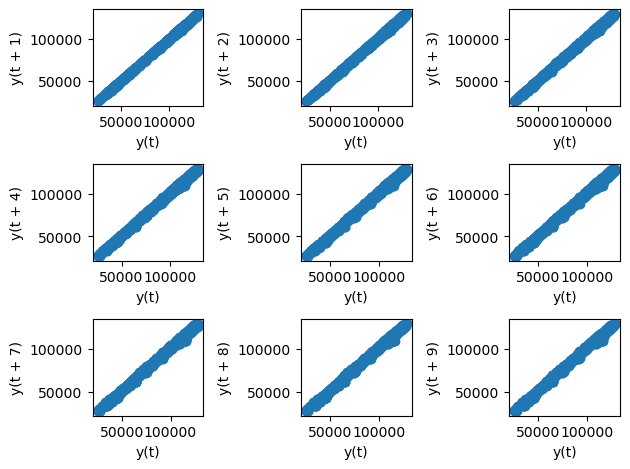

In [35]:
fig, axes = plt.subplots(3,3)
for i, ax in zip(range(1,10), axes.flatten()):
    pd.plotting.lag_plot(df['y'], lag=i, ax=ax)
plt.tight_layout()

In [43]:
df = pd.read_csv(f'../DATA/aus_production.csv')
df = df.dropna()
df.head()

,ds,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956-01-01,284,5225.0,189.0,465,3923,5
1,1956-04-01,213,5178.0,204.0,532,4436,6
2,1956-07-01,227,5297.0,208.0,561,4806,7
3,1956-10-01,308,5681.0,197.0,570,4418,6
4,1957-01-01,262,5577.0,187.0,529,4339,5


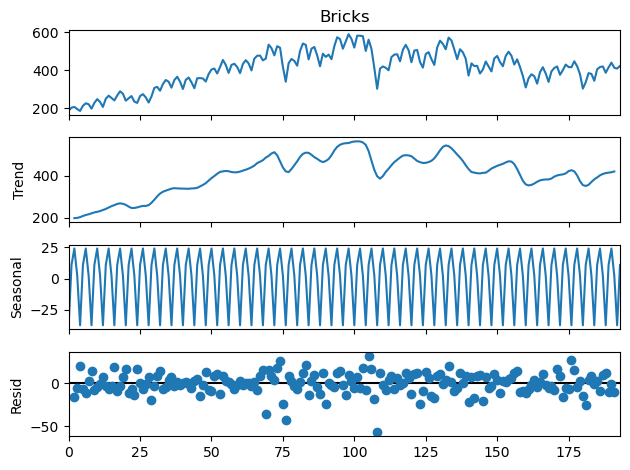

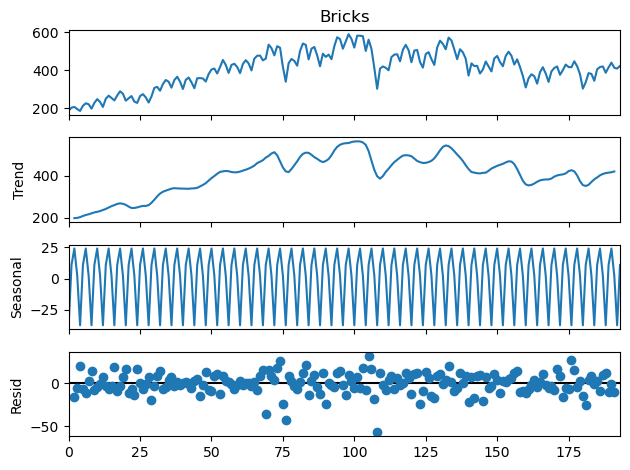

In [44]:
seasonal_decompose(x = df['Bricks'], period=4).plot()

<Axes: ylabel='seasonal'>

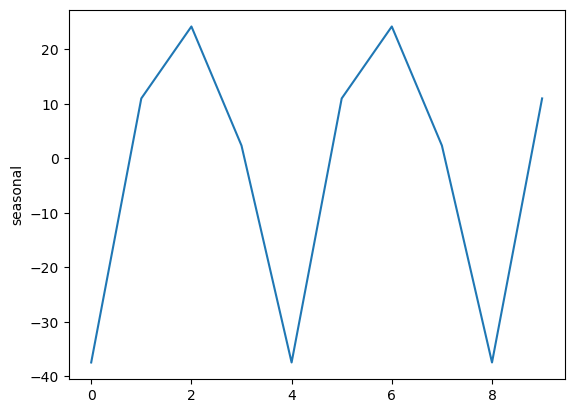

In [50]:
season = seasonal_decompose(df['Bricks'], period=4).seasonal
sns.lineplot(season[:10])

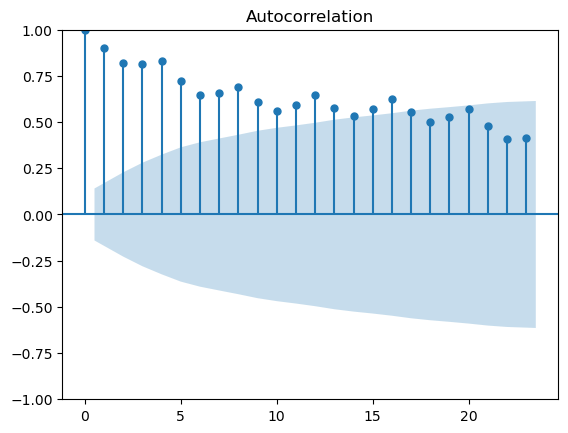

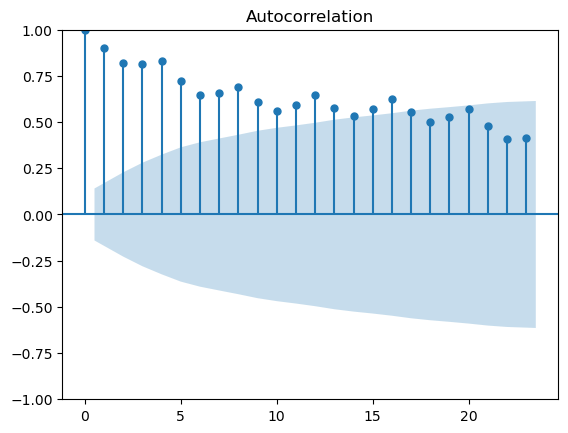

In [51]:
plot_acf(df['Bricks'])

<Axes: >

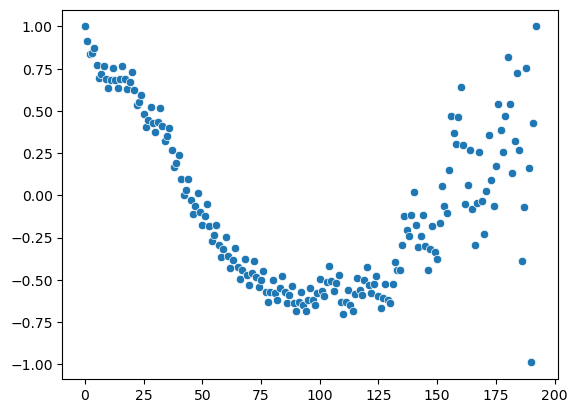

In [52]:
autocor = []
for i in range(1000):
    res = df['Bricks'].autocorr(lag=i) 
    autocor.append(res)
sns.scatterplot(autocor)

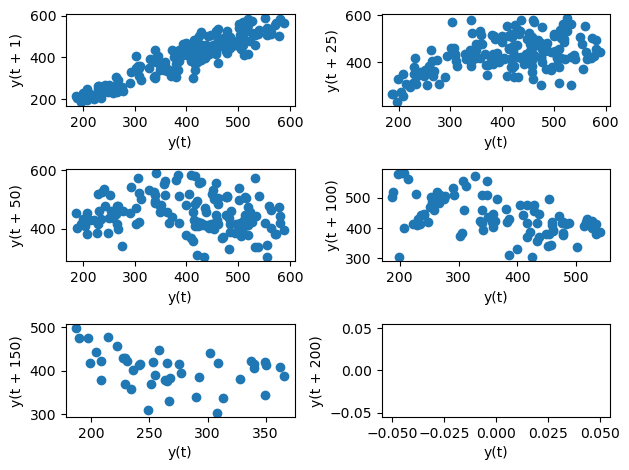

In [54]:
fig, axes = plt.subplots(3,2)
lag = [1, 25, 50, 100, 150, 200]
for i, ax in zip(lag, axes.flatten()):
    pd.plotting.lag_plot(df['Bricks'], lag=i, ax=ax)
plt.tight_layout()

In [56]:
df = pd.read_csv(f'../DATA/pelt.csv')
df = df[df['unique_id'] == 'hare']
df = df.dropna()
df.head()

,unique_id,ds,y
0,hare,1845-01-01,19580
1,hare,1846-01-01,19600
2,hare,1847-01-01,19610
3,hare,1848-01-01,11990
4,hare,1849-01-01,28040


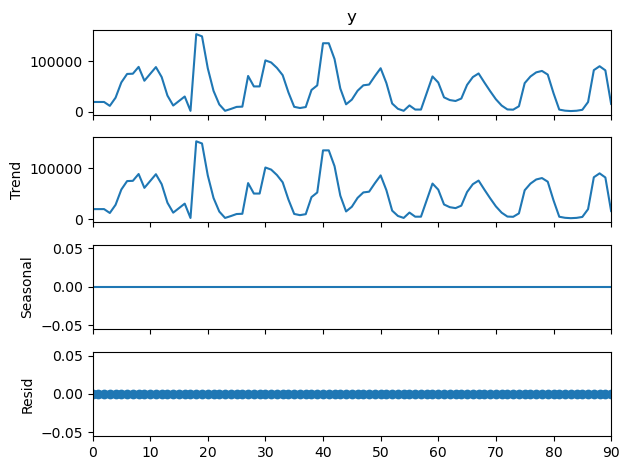

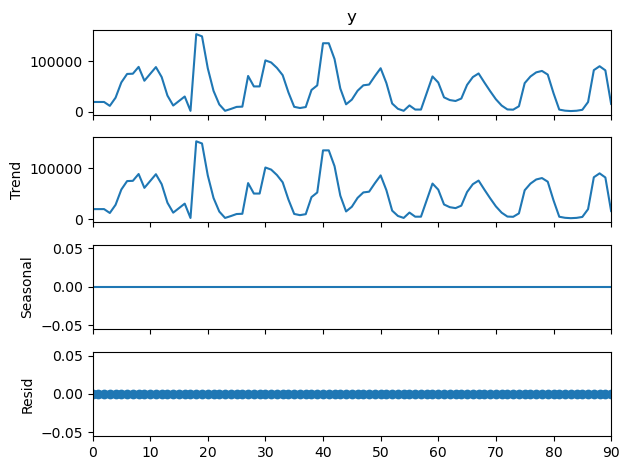

In [65]:
seasonal_decompose(x = df['y'], period=1).plot()

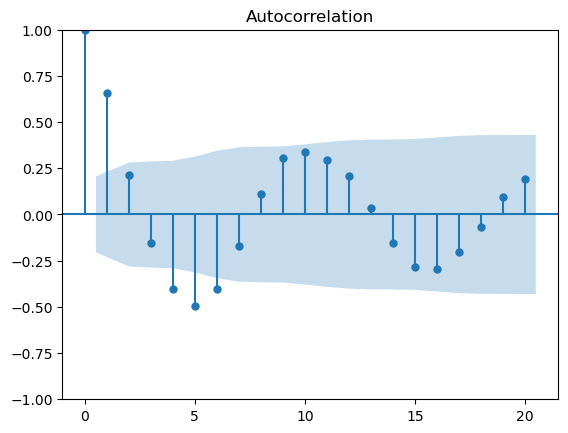

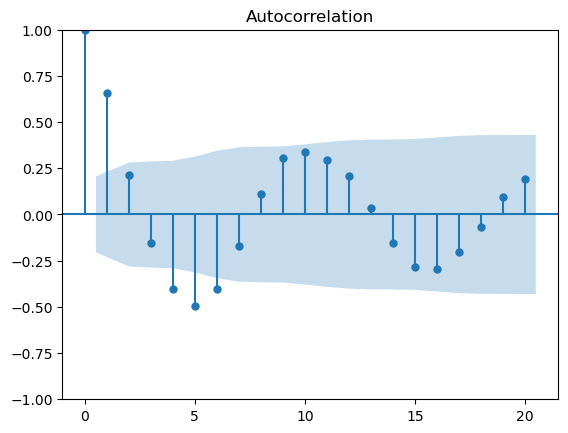

In [66]:
plot_acf(df['y'])

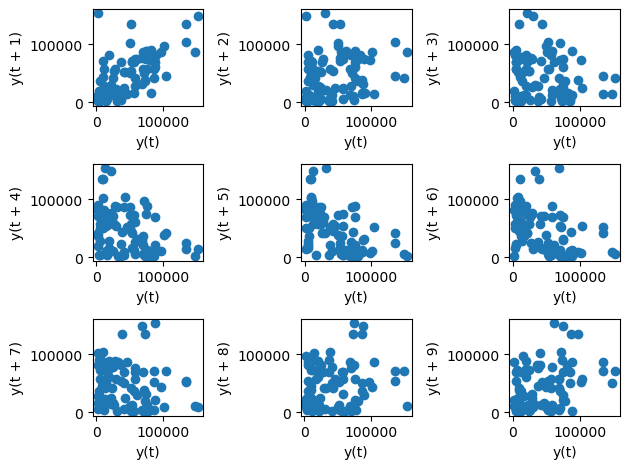

In [68]:
fig, axes = plt.subplots(3,3)
for i, ax in zip(range(1,10), axes.flatten()):
    pd.plotting.lag_plot(df['y'], lag=i, ax=ax)
plt.tight_layout()

In [66]:
df = pd.read_csv(f'../DATA/PBS.csv')
df = df[df['ATC2'] == 'H02']
df = df.set_index('Month')
df = df.groupby('Month')['Cost'].sum()

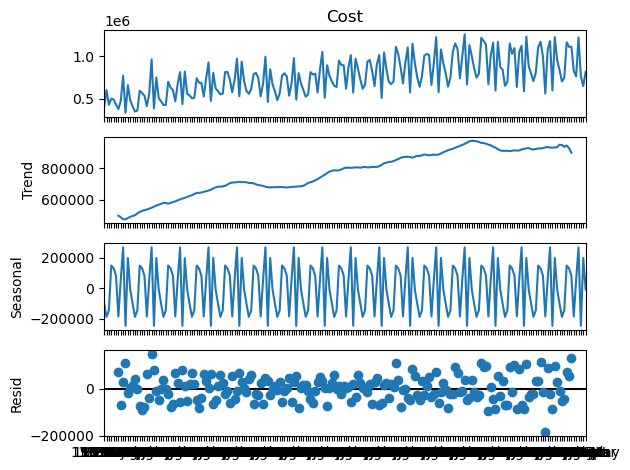

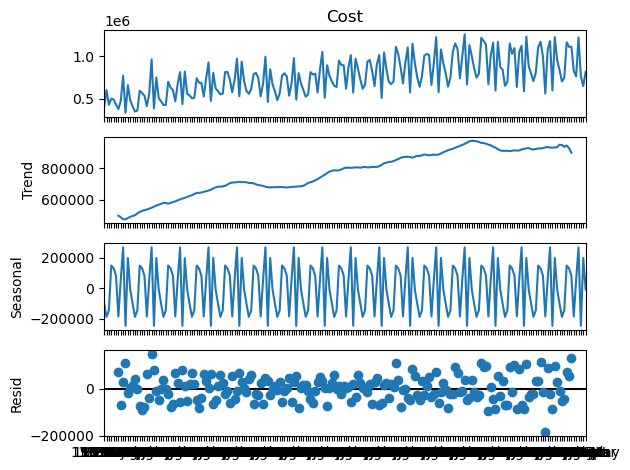

In [69]:
seasonal_decompose(x = df, period=12).plot()

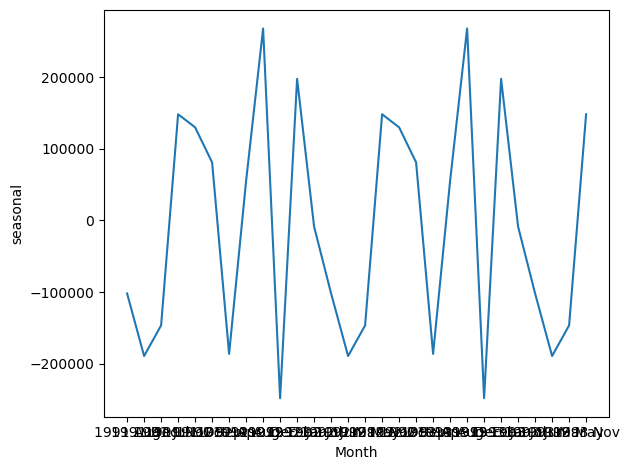

In [43]:
seasonal = seasonal_decompose(df, period=12).seasonal
sns.lineplot(seasonal[0:28])
plt.tight_layout()

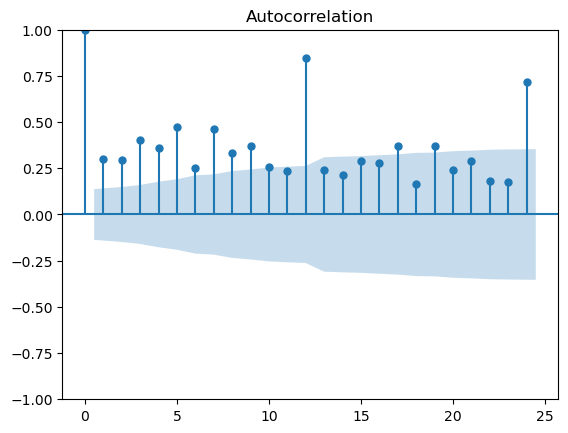

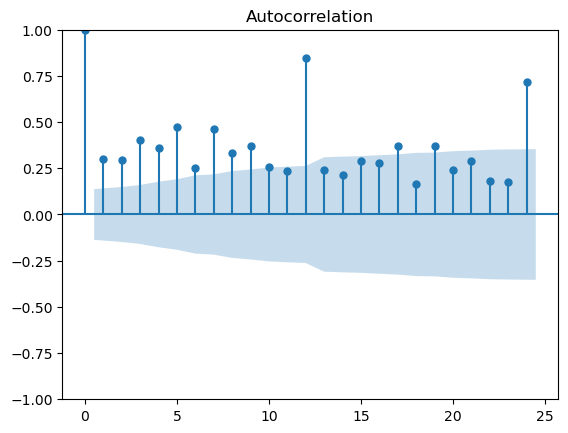

In [70]:
plot_acf(df)